# Modeling and Prediction

In [1]:
#first import programs 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.linear_model import Lasso, Ridge, LogisticRegression
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import roc_curve, auc, accuracy_score, confusion_matrix, classification_report, f1_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, RandomForestRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from yellowbrick.classifier import ConfusionMatrix
import seaborn as sns
from sklearn.pipeline import Pipeline
import warnings
warnings.filterwarnings('ignore')
import xgboost as xgb
pd.options.display.max_columns = 2000
pd.options.display.max_rows = 2000

### Import dataset

In [2]:
import sqlite3
conn = sqlite3.connect('/Users/carlyfaye/Documents/Flatiron/Pickem_Predictions/SQL_Files/NFL_stats.db')

In [3]:
#create cursor
c = conn.cursor()

In [4]:
#table check 
query = '''
SELECT Win, Total_Yds_Gm
FROM stats_2019
Where Team_Name == "Bears";'''

c.execute(query).fetchall()

[(0.0, 254.0),
 (1.0, 273.0),
 (1.0, 298.0),
 (1.0, 269.0),
 (0.0, 236.0),
 (0.0, 252.0),
 (0.0, 388.0),
 (0.0, 164.0),
 (1.0, 226.0),
 (0.0, 267.0),
 (1.0, 335.0),
 (1.0, 419.0),
 (1.0, 382.0),
 (0.0, 415.0),
 (0.0, 234.0),
 (1.0, 337.0),
 (0.0, 254.0),
 (1.0, 273.0),
 (1.0, 298.0),
 (1.0, 269.0),
 (0.0, 236.0),
 (0.0, 252.0),
 (0.0, 388.0),
 (0.0, 164.0),
 (1.0, 226.0),
 (0.0, 267.0),
 (1.0, 335.0),
 (1.0, 419.0),
 (1.0, 382.0),
 (0.0, 415.0),
 (0.0, 234.0),
 (1.0, 337.0),
 (0.0, 254.0),
 (1.0, 273.0),
 (1.0, 298.0),
 (1.0, 269.0),
 (0.0, 236.0),
 (0.0, 252.0),
 (0.0, 388.0),
 (0.0, 164.0),
 (1.0, 226.0),
 (0.0, 267.0),
 (1.0, 335.0),
 (1.0, 419.0),
 (1.0, 382.0),
 (0.0, 415.0),
 (0.0, 234.0),
 (1.0, 337.0)]

In [5]:
#Query info from SQL database

query_1 = """
SELECT * 
FROM stats_2019 
"""

In [6]:
#put query info into a dataframe 

data = pd.read_sql_query(query_1, conn)

In [7]:
#table check 

data

index   Team_Name  Pts_Scored  Pts_Al  Win  TDs  First_Sc  Second_Sc  \
0         0       Bears         3.0    10.0  0.0  0.0       3.0        0.0   
1         1       Bears        16.0    14.0  1.0  1.0       0.0        6.0   
2         2       Bears        31.0    15.0  1.0  3.0       7.0       21.0   
3         3       Bears        16.0     6.0  1.0  1.0       7.0        3.0   
4         4       Bears        21.0    24.0  0.0  3.0       0.0        0.0   
5         5       Bears        25.0    36.0  0.0  2.0       7.0        3.0   
6         6       Bears        16.0    17.0  0.0  1.0       0.0        9.0   
7         7       Bears        14.0    22.0  0.0  2.0       0.0        0.0   
8         8       Bears        20.0    13.0  1.0  3.0       0.0        7.0   
9         9       Bears         7.0    17.0  0.0  1.0       0.0        0.0   
10       10       Bears        19.0    14.0  1.0  2.0       0.0        3.0   
11       11       Bears        24.0    20.0  1.0  3.0       7.0        3.0   
12       12       Bears        31.0    24.0  1.0  4.0       0.0       17.0   
13       13       Bears        13.0    21.0  0.0  1.0       0.0        3.0   
14       14       Bears         3.0    26.0  0.0  0.0       0.0        0.0   
15       15       Bears        21.0    19.0  1.0  1.0       6.0        5.0   
16       16     Bengals        20.0    21.0  0.0  2.0       3.0       14.0   
17       17     Bengals        17.0    41.0  0.0  2.0       7.0        3.0   
18       18     Bengals        17.0    21.0  0.0  2.0       0.0        0.0   
19       19     Bengals         3.0    27.0  0.0  0.0       3.0        0.0   
20       20     Bengals        23.0    26.0  0.0  2.0       3.0        3.0   
21       21     Bengals        17.0    23.0  0.0  1.0       7.0        3.0   
22       22     Bengals        17.0    27.0  0.0  2.0       0.0        7.0   
23       23     Bengals        10.0    24.0  0.0  1.0       0.0       10.0   
24       24     Bengals        13.0    49.0  0.0  1.0       0.0       10.0   
25       25     Bengals        10.0    17.0  0.0  1.0       7.0        0.0   
26       26     Bengals        10.0    16.0  0.0  1.0       0.0        7.0   
27       27     Bengals        22.0     6.0  1.0  2.0       7.0       10.0   
28       28     Bengals        19.0    27.0  0.0  1.0       6.0        7.0   
29       29     Bengals        13.0    34.0  0.0  1.0      10.0        0.0   
30       30     Bengals        35.0    38.0  0.0  4.0       0.0        6.0   
31       31     Bengals        33.0    23.0  1.0  4.0      13.0        7.0   
32       32       Bills        17.0    16.0  1.0  2.0       0.0        0.0   
33       33       Bills        28.0    14.0  1.0  4.0       7.0       14.0   
34       34       Bills        21.0    17.0  1.0  2.0       8.0        6.0   
35       35       Bills        10.0    16.0  0.0  1.0       0.0        3.0   
36       36       Bills        14.0     7.0  1.0  2.0       0.0        7.0   
37       37       Bills        31.0    21.0  1.0  2.0       6.0        3.0   
38       38       Bills        13.0    31.0  0.0  2.0       0.0        7.0   
39       39       Bills        24.0     9.0  1.0  3.0      10.0        7.0   
40       40       Bills        16.0    19.0  0.0  2.0       0.0        7.0   
41       41       Bills        37.0    20.0  1.0  4.0       6.0       17.0   
42       42       Bills        20.0     3.0  1.0  2.0       3.0        3.0   
43       43       Bills        26.0    15.0  1.0  3.0       0.0       13.0   
44       44       Bills        17.0    24.0  0.0  1.0       0.0        6.0   
45       45       Bills        17.0    10.0  1.0  2.0       0.0        7.0   
46       46       Bills        17.0    24.0  0.0  2.0       3.0        7.0   
47       47       Bills         6.0    13.0  0.0  0.0       0.0        0.0   
48       48       Bills        19.0    22.0  0.0  1.0       7.0        6.0   
49       49     Broncos        16.0    24.0  0.0  1.0       0.0        0.0   
50       50     Broncos     

### Preprocessing

In [8]:
data.dtypes

index                          int64
Team_Name                     object
Pts_Scored                   float64
Pts_Al                       float64
Win                          float64
TDs                          float64
First_Sc                     float64
Second_Sc                    float64
Third_Sc                     float64
Fourth_Sc                    float64
First_Al                     float64
Second_Al                    float64
Third_Al                     float64
Fourth_Al                    float64
Off_Plys                     float64
Rush_Plys                    float64
Pass_Plys                    float64
Fumbles                      float64
Yds_Ply                      float64
Yds_Rush                     float64
Yds_Pass                     float64
Total_Yds_Gm                 float64
Total_Rush_Yds_Gm            float64
Total_Pass_Yds_Gm            float64
Yds_Ply_Al                   float64
Yds_Rush_Al                  float64
Yds_Pass_Al                  float64
T

#### Everything looks pretty good. I'll drop the index column and the penlaty column (because it's represented in other columns). We also no longer need Opp_Name. I'll also drop superbowl_win, and year beacuse we don't need those either.

In [9]:
data = data.drop(['index','Penalties', 'Opp_Name', 'Superbowl_Win','Year'], axis=1)

In [10]:
data.dtypes

Team_Name                     object
Pts_Scored                   float64
Pts_Al                       float64
Win                          float64
TDs                          float64
First_Sc                     float64
Second_Sc                    float64
Third_Sc                     float64
Fourth_Sc                    float64
First_Al                     float64
Second_Al                    float64
Third_Al                     float64
Fourth_Al                    float64
Off_Plys                     float64
Rush_Plys                    float64
Pass_Plys                    float64
Fumbles                      float64
Yds_Ply                      float64
Yds_Rush                     float64
Yds_Pass                     float64
Total_Yds_Gm                 float64
Total_Rush_Yds_Gm            float64
Total_Pass_Yds_Gm            float64
Yds_Ply_Al                   float64
Yds_Rush_Al                  float64
Yds_Pass_Al                  float64
Total_Yds_Gm_Al              float64
T

### Feature Engineering

In order to actually run a regression on this information we'll need to manipulate it a little further. What we want is to continually update the average for each team of each of the datapoints, as well as manipulating the datapoints so each row of the dataframe is the home and away teams, and the outcome of the game. 

First, I'd like to make a for loop that will successfully create one row of the proposed dataframe. 

In [11]:
# we'll not use Team Name as a column, but will all others
columns = data.columns.drop('Team_Name')
columns

Index(['Pts_Scored', 'Pts_Al', 'Win', 'TDs', 'First_Sc', 'Second_Sc',
       'Third_Sc', 'Fourth_Sc', 'First_Al', 'Second_Al', 'Third_Al',
       'Fourth_Al', 'Off_Plys', 'Rush_Plys', 'Pass_Plys', 'Fumbles', 'Yds_Ply',
       'Yds_Rush', 'Yds_Pass', 'Total_Yds_Gm', 'Total_Rush_Yds_Gm',
       'Total_Pass_Yds_Gm', 'Yds_Ply_Al', 'Yds_Rush_Al', 'Yds_Pass_Al',
       'Total_Yds_Gm_Al', 'Total_Rush_Yds_Gm_Al', 'Total_Pass_Yds_Gm_Al',
       'Off_Plys_Al', 'Rush_Plys_Al', 'Pass_Plys_Al', 'Completion_Rate',
       'Pass_Att', 'Pass_TDs', 'INTs', 'Sacks_Taken', 'Rush_TDs', 'Rush_Att',
       'Pass_1Ds_Gm', 'Rush_1Ds_Gm', 'First_Ds_Gm', 'Third_Conv_Perc',
       'Fourth_Conv_Perc', 'Sacks_Gm', 'INT_Gm', 'Fumbles_Caused', 'TO_Gm',
       'FG_Att', 'FG_Perc_Comp', 'PAT_Att', 'PAT_Perc_Comp', 'Punts',
       'Avg_Punt_Yds_Gm', 'Avg_Punt_Ret_Yds_Gm', 'Avg_Punt_Ret_Yds_Opp_Gm',
       'Total_Punt_Ret_Yds_Gm', 'Total_Punt_Ret_Yds_Opp_Gm', 'Punt_Ret_TD',
       'Punt_Ret_TD_Opp', 'Avg_Kick_Ret_Yds_Gm'

In [12]:
Week_1 = {'Packers':'Bears', 'Redskins':'Eagles', 'Bills':'Jets', 'Falcons':'Vikings','Ravens':'Dolphins',
         'Chiefs':'Jaguars','Titans':'Browns','Rams':'Panthers','Bengals':'Seahawks',
          'Colts':'Chargers','49ers':'Buccaneers','Giants':'Cowboys','Lions':'Cardinals',
          'Steelers':'Patriots', 'Texans':'Saints', 'Broncos':'Raiders'}

In [13]:
df = pd.DataFrame()
Week = 1

for x,y in enumerate(Week_1.items()):
    Game = 'Week_'+str(Week)+y[1]
    df.loc[Game, 'Home_Team'] = y[1]
    df.loc[Game, 'Away_Team'] = y[0]
    if data.loc[(data['Team_Name'] == y[1]) & (data['Week_Of_Szn'] == Week)]['Win'].sum() == 0.0:
        df.loc[Game, 'Winner'] = 'Away'
    else:
        df.loc[Game, 'Winner'] = 'Home'
    for column in columns:
        df.loc[Game, 'Home_'+column] = data.loc[(data['Team_Name'] == y[1]) &
                                               (data['Week_Of_Szn'] <= Week)][column].mean()
        df.loc[Game, 'Away_'+column] = data.loc[(data['Team_Name'] == y[0]) & 
                                                          (data['Week_Of_Szn'] <= Week)][column].mean()
    

In [14]:
df

Home_Team Away_Team Winner  Home_Pts_Scored  \
Week_1Bears            Bears   Packers   Away              3.0   
Week_1Eagles          Eagles  Redskins   Home             32.0   
Week_1Jets              Jets     Bills   Away             16.0   
Week_1Vikings        Vikings   Falcons   Home             28.0   
Week_1Dolphins      Dolphins    Ravens   Away             10.0   
Week_1Jaguars        Jaguars    Chiefs   Away             26.0   
Week_1Browns          Browns    Titans   Away             13.0   
Week_1Panthers      Panthers      Rams   Away             27.0   
Week_1Seahawks      Seahawks   Bengals   Home             21.0   
Week_1Chargers      Chargers     Colts   Home             30.0   
Week_1Buccaneers  Buccaneers     49ers   Away             17.0   
Week_1Cowboys        Cowboys    Giants   Home             35.0   
Week_1Cardinals    Cardinals     Lions   Away             27.0   
Week_1Patriots      Patriots  Steelers   Home             33.0   
Week_1Saints          Saints    Texans   Home             30.0   
Week_1Raiders        Raiders   Broncos   Home             24.0   

                  Away_Pts_Scored  Home_Pts_Al  Away_Pts_Al  Home_Win  \
Week_1Bears                  10.0         10.0          3.0       0.0   
Week_1Eagles                 27.0         27.0         32.0       1.0   
Week_1Jets                   17.0         17.0         16.0       0.0   
Week_1Vikings                12.0         12.0         28.0       1.0   
Week_1Dolphins               59.0         59.0         10.0       0.0   
Week_1Jaguars                40.0         40.0         26.0       0.0   
Week_1Browns                 43.0         43.0         13.0       0.0   
Week_1Panthers               30.0         30.0         27.0       0.0   
Week_1Seahawks               20.0         20.0         21.0       1.0   
Week_1Chargers               24.0         24.0         30.0       1.0   
Week_1Buccaneers             31.0         31.0         17.0       0.0   
Week_1Cowboys                17.0         17.0         35.0       1.0   
Week_1Cardinals              27.0         27.0         27.0       0.0   
Week_1Patriots                3.0          3.0         33.0       1.0   
Week_1Saints                 28.0         28.0         30.0       1.0   
Week_1Raiders                16.0         16.0         24.0       1.0   

                  Away_Win  Home_TDs  Away_TDs  Home_First_Sc  Away_First_Sc  \
Week_1Bears            1.0       0.0       1.0            3.0            0.0   
Week_1Eagles           0.0       4.0       3.0            0.0           10.0   
Week_1Jets             1.0       1.0       2.0            6.0            0.0   
Week_1Vikings          0.0       4.0       2.0           14.0            0.0   
Week_1Dolphins         1.0       1.0       8.0            0.0           21.0   
Week_1Jaguars          1.0       3.0       4.0            7.0           17.0   
Week_1Browns           1.0       2.0       4.0            6.0            3.0   
Week_1Panthers         1.0       3.0       3.0            0.0            0.0   
Week_1Seahawks         0.0       3.0       2.0            0.0            3.0   
Week_1Chargers         0.0       4.0       3.0            7.0            0.0   
Week_1Buccaneers       1.0       1.0       1.0            0.0            3.0   
Week_1Cowboys          0.0       5.0       2.0            7.0            7.0   
Week_1Cardinals        0.0       2.0       3.0            0.0            0.0   
Week_1Patriots         0.0       3.0       0.0            7.0            0.0   
Week_1Saints           0.0       3.0       4.0            0.0            0.0   
Week_1Raiders          0.0       3.0       1.0            7.0            0.0   

                  Home_Second_Sc  Away_Second_Sc  Home_Third_Sc  \
Week_1Bears                  0.0             7.0            0.0   
Week_1Eagles                 7.0            10.0           14.0   
Week_1Jets                   0.0             0.0           10.0   
Week_1Vikings            

#### Awesome! That worked! Now let's make this a function so we can loop through all the games in a single week, and weeks in a season. 

In [15]:
def Get_Table(Week_Dict, Week):
    df = pd.DataFrame()
    for x,y in enumerate(Week_Dict.items()):
        Week = Week
        Game = 'Week_'+str(Week)+'_'+y[1]
        df.loc[Game, 'Home_Team'] = y[1]
        df.loc[Game, 'Away_Team'] = y[0]
        if data.loc[(data['Team_Name'] == y[1]) & (data['Week_Of_Szn'] == Week)]['Win'].sum() == 0.0:
            df.loc[Game, 'Winner'] = 'Away'
        else:
            df.loc[Game, 'Winner'] = 'Home'
        for column in columns:
            df.loc[Game, 'Home_'+column] = data.loc[(data['Team_Name'] == y[1]) &
                                                   (data['Week_Of_Szn'] <= Week)][column].mean()
            df.loc[Game, 'Away_'+column] = data.loc[(data['Team_Name'] == y[0]) & 
                                                              (data['Week_Of_Szn'] <= Week)][column].mean()

    
    return df

In [16]:
#sanity check 
Get_Table(Week_1, 1)

Home_Team Away_Team Winner  Home_Pts_Scored  \
Week_1_Bears            Bears   Packers   Away              3.0   
Week_1_Eagles          Eagles  Redskins   Home             32.0   
Week_1_Jets              Jets     Bills   Away             16.0   
Week_1_Vikings        Vikings   Falcons   Home             28.0   
Week_1_Dolphins      Dolphins    Ravens   Away             10.0   
Week_1_Jaguars        Jaguars    Chiefs   Away             26.0   
Week_1_Browns          Browns    Titans   Away             13.0   
Week_1_Panthers      Panthers      Rams   Away             27.0   
Week_1_Seahawks      Seahawks   Bengals   Home             21.0   
Week_1_Chargers      Chargers     Colts   Home             30.0   
Week_1_Buccaneers  Buccaneers     49ers   Away             17.0   
Week_1_Cowboys        Cowboys    Giants   Home             35.0   
Week_1_Cardinals    Cardinals     Lions   Away             27.0   
Week_1_Patriots      Patriots  Steelers   Home             33.0   
Week_1_Saints          Saints    Texans   Home             30.0   
Week_1_Raiders        Raiders   Broncos   Home             24.0   

                   Away_Pts_Scored  Home_Pts_Al  Away_Pts_Al  Home_Win  \
Week_1_Bears                  10.0         10.0          3.0       0.0   
Week_1_Eagles                 27.0         27.0         32.0       1.0   
Week_1_Jets                   17.0         17.0         16.0       0.0   
Week_1_Vikings                12.0         12.0         28.0       1.0   
Week_1_Dolphins               59.0         59.0         10.0       0.0   
Week_1_Jaguars                40.0         40.0         26.0       0.0   
Week_1_Browns                 43.0         43.0         13.0       0.0   
Week_1_Panthers               30.0         30.0         27.0       0.0   
Week_1_Seahawks               20.0         20.0         21.0       1.0   
Week_1_Chargers               24.0         24.0         30.0       1.0   
Week_1_Buccaneers             31.0         31.0         17.0       0.0   
Week_1_Cowboys                17.0         17.0         35.0       1.0   
Week_1_Cardinals              27.0         27.0         27.0       0.0   
Week_1_Patriots                3.0          3.0         33.0       1.0   
Week_1_Saints                 28.0         28.0         30.0       1.0   
Week_1_Raiders                16.0         16.0         24.0       1.0   

                   Away_Win  Home_TDs  Away_TDs  Home_First_Sc  Away_First_Sc  \
Week_1_Bears            1.0       0.0       1.0            3.0            0.0   
Week_1_Eagles           0.0       4.0       3.0            0.0           10.0   
Week_1_Jets             1.0       1.0       2.0            6.0            0.0   
Week_1_Vikings          0.0       4.0       2.0           14.0            0.0   
Week_1_Dolphins         1.0       1.0       8.0            0.0           21.0   
Week_1_Jaguars          1.0       3.0       4.0            7.0           17.0   
Week_1_Browns           1.0       2.0       4.0            6.0            3.0   
Week_1_Panthers         1.0       3.0       3.0            0.0            0.0   
Week_1_Seahawks         0.0       3.0       2.0            0.0            3.0   
Week_1_Chargers         0.0       4.0       3.0            7.0            0.0   
Week_1_Buccaneers       1.0       1.0       1.0            0.0            3.0   
Week_1_Cowboys          0.0       5.0       2.0            7.0            7.0   
Week_1_Cardinals        0.0       2.0       3.0            0.0            0.0   
Week_1_Patriots         0.0       3.0       0.0            7.0            0.0   
Week_1_Saints           0.0       3.0       4.0            0.0            0.0   
Week_1_Raiders          0.0       3.0       1.0            7.0            0.0   

                   Home_Second_Sc  Away_Second_Sc  Home_Third_Sc  \
Week_1_Bears                  0.0             7.0            0.0   
Week_1_Eagles                 7.0            10.0           14.0   
Week_1_Jets                   0.0      

#### Excellent, that seems to be working quite well. Now we'll need to create a dictionary of all the weeks in the season and try to loop through all of those. 

In [17]:
Schedule_2019 = {
    'Week_1' : {'Packers':'Bears', 'Redskins':'Eagles', 'Bills':'Jets', 'Falcons':'Vikings','Ravens':'Dolphins',
                'Chiefs':'Jaguars','Titans':'Browns','Rams':'Panthers','Bengals':'Seahawks','Colts':'Chargers',
                '49ers':'Buccaneers','Giants':'Cowboys','Lions':'Cardinals','Steelers':'Patriots', 'Texans':'Saints',
                'Broncos':'Raiders'},
    'Week_2' : {'Buccaneers':'Panthers','Cowboys':'Redskins','Colts':'Titans','Seahawks':'Steelers','Bills':'Giants',
             'Patriots':'Dolphins','Jaguars':'Texans','Vikings':'Packers','Chargers':'Lions','49ers':'Bengals',
             'Cardinals':'Ravens','Chiefs':'Raiders','Saints':'Rams','Bears':'Broncos','Eagles':'Falcons','Browns':'Jets'},
    'Week_3' : {'Titans':'Jaguars','Lions':'Eagles','Jets':'Patriots','Raiders':'Vikings','Ravens':'Chiefs','Falcons':'Colts',
             'Broncos':'Packers','Dolphins':'Cowboys','Bengals':'Bills','Giants':'Buccaneers','Panthers':'Cardinals',
             'Steelers':'49ers','Saints':'Seahawks','Texans':'Chargers','Rams':'Browns','Bears':'Redskins'},
    'Week_4' : {'Eagles':'Packers','Redskins':'Giants','Chargers':'Dolphins','Raiders':'Colts','Panthers':'Texans',
             'Chiefs':'Lions','Patriots':'Bills','Browns':'Ravens','Titans':'Falcons','Buccaneers':'Rams',
             'Seahawks':'Cardinals','Jaguars':'Broncos','Vikings':'Bears','Cowboys':'Saints','Bengals':'Steelers'},
    'Week_5' : {'Rams':'Seahawks','Patriots':'Redskins','Bills':'Titans','Ravens':'Steelers','Jets':'Eagles',
             'Bears':'Raiders','Vikings':'Giants','Buccaneers':'Saints','Falcons':'Texans','Cardinals':'Bengals',
             'Jaguars':'Panthers','Broncos':'Chargers','Packers':'Cowboys','Colts':'Chiefs','Browns':'49ers'},
    'Week_6' : {'Giants':'Patriots','Eagles':'Vikings','Redskins':'Dolphins','Texans':'Chiefs','Saints':'Jaguars',
             'Seahawks':'Browns','Bengals':'Ravens','49ers':'Rams','Falcons':'Cardinals','Cowboys':'Jets',
             'Titans':'Broncos','Steelers':'Chargers','Lions':'Packers','Panthers':'Buccaneers'},
    'Week_7' : {'Chiefs':'Broncos','49ers':'Redskins','Cardinals':'Giants','Texans':'Colts','Raiders':'Packers',
             'Vikings':'Lions','Jaguars':'Bengals','Dolphins':'Bills','Rams':'Falcons','Chargers':'Titans',
             'Ravens':'Seahawks','Saints':'Bears','Eagles':'Cowboys','Patriots':'Jets'},
    'Week_8' : {'Redskins':'Vikings','Broncos':'Colts','Buccaneers':'Titans','Cardinals':'Saints','Bengals':'Rams',
             'Jets':'Jaguars','Giants':'Lions','Chargers':'Bears','Eagles':'Bills','Seahawks':'Falcons',
             'Panthers':'49ers','Browns':'Patriots','Raiders':'Texans','Packers':'Chiefs','Dolphins':'Steelers'},
    'Week_9' : {'49ers':'Cardinals','Texans':'Jaguars','Colts':'Steelers','Bears':'Eagles','Jets':'Dolphins',
             'Vikings':'Chiefs','Titans':'Panthers','Redskins':'Bills','Buccaneers':'Seahawks','Lions':'Raiders',
             'Packers':'Chargers','Browns':'Broncos','Patriots':'Ravens','Cowboys':'Giants'},
    'Week_10' : {'Chargers':'Raiders','Chiefs':'Titans','Cardinals':'Buccaneers','Giants':'Jets','Falcons':'Saints',
              'Bills':'Browns','Ravens':'Bengals','Lions':'Bears','Dolphins':'Colts','Rams':'Steelers','Panthers':'Packers',
              'Vikings':'Cowboys','Seahawks':'49ers'},
    'Week_11' : {'Steelers':'Browns','Jets':'Redskins','Saints':'Buccaneers','Broncos':'Vikings','Bills':'Dolphins',
              'Jaguars':'Colts','Cowboys':'Lions','Falcons':'Panthers','Texans':'Ravens','Cardinals':'49ers',
              'Patriots':'Eagles','Bengals':'Raiders','Bears':'Rams','Chiefs':'Chargers'},
    'Week_12' : {'Colts':'Texans','Seahawks':'Eagles','Lions':'Redskins','Raiders':'Jets','Panthers':'Saints',
              'Dolphins':'Browns','Steelers':'Bengals','Giants':'Bears','Broncos':'Bills','Buccaneers':'Falcons',
              'Jaguars':'Titans','Cowboys':'Patriots','Packers':'49ers','Ravens':'Rams'},
    'Week_13' : {'Bears':'Lions','Bills':'Cowboys','Saints':'Falcons','Browns':'Steelers','Packers':'Giants',
              'Eagles':'Dolphins','Buccaneers':'Jaguars','Titans':'Colts','Jets':'Bengals','Redskins':'Panthers',
              '49ers':'Ravens','Rams':'Cardinals','Chargers':'Broncos','Raiders':'Chiefs','Patriots':'Texans',
              'Vikings':'Seahawks'},
    'Week_14' : {'Cowboys':'Bears', 'Colts':'Buccaneers','Dolphins':'Jets','49ers':'Saints','Lions':'Vikings',
              'Broncos':'Texans', 'Redskins':'Packers','Bengals':'Browns','Ravens':'Bills','Panthers':'Falcons',
              'Chargers':'Jaguars','Titans':'Raiders','Chiefs':'Patriots','Steelers':'Cardinals','Seahawks':'Rams',
              'Giants':'Eagles'},
    'Week_15' : {'Jets':'Ravens','Eagles':'Redskins','Texans':'Titans','Dolphins':'Giants','Broncos':'Chiefs',
              'Bears':'Packers','Buccaneers':'Lions','Patriots':'Bengals','Seahawks':'Panthers','Vikings':'Chargers',
              'Jaguars':'Raiders','Browns':'Cardinals','Falcons':'49ers','Rams':'Cowboys','Bills':'Steelers',
              'Colts':'Saints'},
    'Week_16' : {'Texans':'Buccaneers','Bills':'Patriots','Rams':'49ers','Giants':'Redskins','Saints':'Titans',
                'Steelers':'Jets','Bengals':'Dolphins','Panthers':'Colts','Ravens':'Browns','Jaguars':'Falcons',
                'Raiders':'Chargers','Lions':'Broncos','Cardinals':'Seahawks','Cowboys':'Eagles','Chiefs':'Bears',
                'Packers':'Vikings'},
    'Week_17' : {'Falcons':'Buccaneers','Dolphins':'Patriots','Bears':'Vikings','Chargers':'Chiefs','Packers':'Lions',
                'Browns':'Bengals','Saints':'Panthers','Jets':'Bills','Cardinals':'Rams','Raiders':'Broncos',
                'Eagles':'Giants','Colts':'Jaguars','Titans':'Texans','Redskins':'Cowboys','Steelers':'Ravens',
                '49ers':'Seahawks'},
    'Week_18' : {'Bills':'Texans','Titans':'Patriots','Vikings':'Saints','Seahawks':'Eagles'},
    
    'Week_19' : {'Vikings':'49ers','Titans':'Ravens', 'Texans':'Chiefs','Seahawks':'Packers'},
    
    'Week_20' : {'Titans':'Chiefs','Packers':'49ers'},
    
    'Week_21' : {'49ers':'Chiefs'}
    
}

In [18]:
NFL = pd.DataFrame()

for num, week in enumerate(Schedule_2019.keys()):
    number = num +1
    NFL = pd.concat([NFL, Get_Table(Schedule_2019[week], number)])

In [19]:
NFL.head()

Home_Team Away_Team Winner  Home_Pts_Scored  Away_Pts_Scored  \
Week_1_Bears        Bears   Packers   Away              3.0             10.0   
Week_1_Eagles      Eagles  Redskins   Home             32.0             27.0   
Week_1_Jets          Jets     Bills   Away             16.0             17.0   
Week_1_Vikings    Vikings   Falcons   Home             28.0             12.0   
Week_1_Dolphins  Dolphins    Ravens   Away             10.0             59.0   

                 Home_Pts_Al  Away_Pts_Al  Home_Win  Away_Win  Home_TDs  \
Week_1_Bears            10.0          3.0       0.0       1.0       0.0   
Week_1_Eagles           27.0         32.0       1.0       0.0       4.0   
Week_1_Jets             17.0         16.0       0.0       1.0       1.0   
Week_1_Vikings          12.0         28.0       1.0       0.0       4.0   
Week_1_Dolphins         59.0         10.0       0.0       1.0       1.0   

                 Away_TDs  Home_First_Sc  Away_First_Sc  Home_Second_Sc  \
Week_1_Bears          1.0            3.0            0.0             0.0   
Week_1_Eagles         3.0            0.0           10.0             7.0   
Week_1_Jets           2.0            6.0            0.0             0.0   
Week_1_Vikings        2.0           14.0            0.0             7.0   
Week_1_Dolphins       8.0            0.0           21.0            10.0   

                 Away_Second_Sc  Home_Third_Sc  Away_Third_Sc  Home_Fourth_Sc  \
Week_1_Bears                7.0            0.0            0.0             0.0   
Week_1_Eagles              10.0           14.0            0.0            11.0   
Week_1_Jets                 0.0           10.0            3.0             0.0   
Week_1_Vikings              0.0            7.0            0.0             0.0   
Week_1_Dolphins            21.0            0.0           10.0             0.0   

                 Away_Fourth_Sc  Home_First_Al  Away_First_Al  Home_Second_Al  \
Week_1_Bears                3.0            0.0            3.0             7.0   
Week_1_Eagles               7.0           10.0            0.0            10.0   
Week_1_Jets                14.0            0.0            6.0             0.0   
Week_1_Vikings             12.0            0.0           14.0             0.0   
Week_1_Dolphins             7.0           21.0            0.0            21.0   

                 Away_Second_Al  Home_Third_Al  Away_Third_Al  Home_Fourth_Al  \
Week_1_Bears                0.0            0.0            0.0             3.0   
Week_1_Eagles               7.0            0.0           14.0             7.0   
Week_1_Jets                 0.0            3.0           10.0            14.0   
Week_1_Vikings              7.0            0.0            7.0            12.0   
Week_1_Dolphins            10.0           10.0            0.0             7.0   

                 Away_Fourth_Al  Home_Off_Plys  Away_Off_Plys  Home_Rush_Plys  \
Week_1_Bears                0.0           65.0           57.0            15.0   
Week_1_Eagles              11.0           71.0           58.0            31.0   
Week_1_Jets                 0.0           66.0           63.0            21.0   
Week_1_Vikings              0.0           49.0           67.0            38.0   
Week_1_Dolphins             0.0           47.0           73.0            12.0   

                 Away_Rush_Plys  Home_Pass_Plys  Away_Pass_Plys  Home_Fumbles  \
Week_1_Bears               22.0            45.0            30.0           0.0   
Week_1_Eagles              13.0            39.0            44.0           0.0   
Week_1_Jets                25.0            41.0            37.0           1.0   
Week_1_Vikings             17.0            10.0            46.0           0.0   
Week_1_Dolphins            46.0            32.0            26.0           1.0   

                 Away_Fumbles  Home_Yds_Ply  Away_Yds_Ply  Home_Yds_Rush  \
Week_1_Bears              0.0           3.9           3.7            3.1   
Week_1_Eagles             0.0           6.1   

In [20]:
NFL.isna().any()

Home_Team                         False
Away_Team                         False
Winner                            False
Home_Pts_Scored                   False
Away_Pts_Scored                   False
Home_Pts_Al                       False
Away_Pts_Al                       False
Home_Win                          False
Away_Win                          False
Home_TDs                          False
Away_TDs                          False
Home_First_Sc                     False
Away_First_Sc                     False
Home_Second_Sc                    False
Away_Second_Sc                    False
Home_Third_Sc                     False
Away_Third_Sc                     False
Home_Fourth_Sc                    False
Away_Fourth_Sc                    False
Home_First_Al                     False
Away_First_Al                     False
Home_Second_Al                    False
Away_Second_Al                    False
Home_Third_Al                     False
Away_Third_Al                     False


In [21]:
#lets replace the two with the mean - it's showing NaN for games where no FGs were attempted

NFL.Home_FG_Perc_Comp = NFL.Home_FG_Perc_Comp.fillna(NFL.Home_FG_Perc_Comp.mean())
NFL.Away_FG_Perc_Comp = NFL.Away_FG_Perc_Comp.fillna(NFL.Away_FG_Perc_Comp.mean())

#### Huzzah!! Now that is an efficient three lines of code. Now we can FINALLY perform our feature selection. 

In [22]:
X = NFL.drop(['Winner','Home_Team','Away_Team','Home_Win','Away_Win'], axis=1)
y = NFL.Winner

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=11, test_size=.2)

In [23]:
#sanity check 

print('Train datapoints:', len(y_train))
print('Test datapoints:', len(y_test))

Train datapoints: 213
Test datapoints: 54


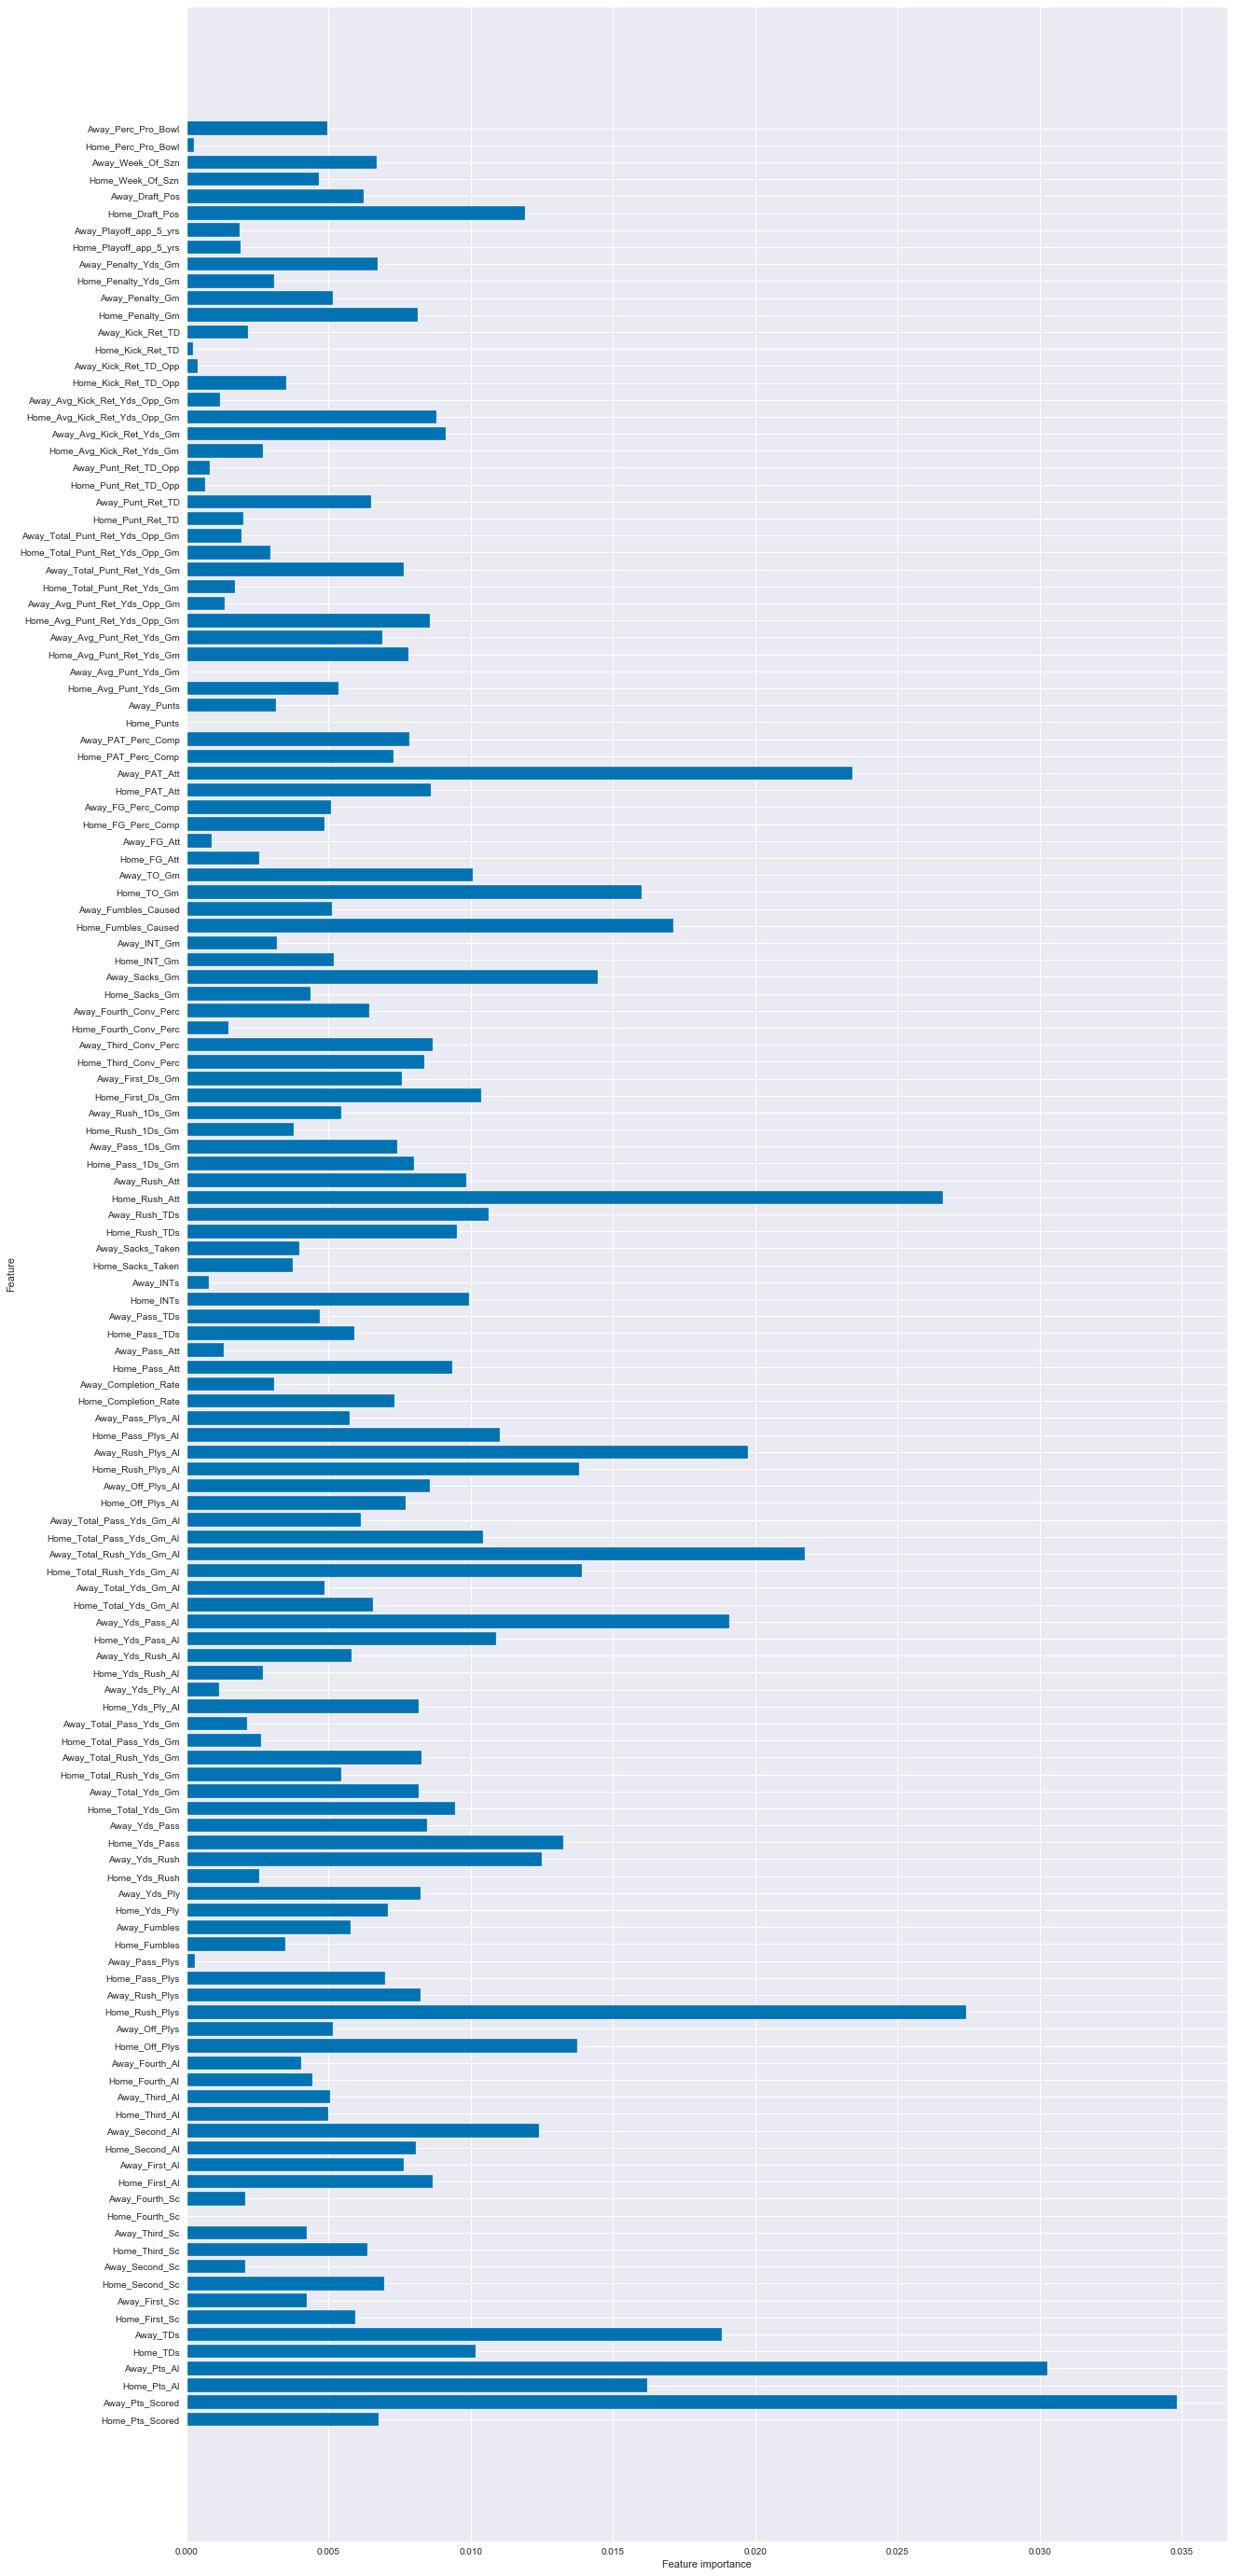

In [24]:
#build forest 
nfl_forest = RandomForestClassifier(n_estimators = 25, max_depth=6)
nfl_forest.fit(X_train, y_train)

#feature importance 
sns.set_style('darkgrid')
colors = sns.set_palette('colorblind')

def plot_feature_importances(model):
    n_features = X_train.shape[1]
    plt.figure(figsize=(20,50))
    X = range(n_features)
    plt.barh(X, model.feature_importances_, align='center') 
    plt.yticks(np.arange(n_features), X_train.columns.values) 
    plt.xlabel('Feature importance')
    plt.ylabel('Feature')

plot_feature_importances(nfl_forest)

In [25]:
#put features in a dictionary
features = {}

for feature, importance in zip(X.columns, nfl_forest.feature_importances_):
    features[feature] = importance
    
#create dataframe with importances
nfl_importance = pd.DataFrame.from_dict(features, orient='index')

nfl_importance = nfl_importance.rename(columns={0:'Importance'})

#sort by level of importance 
nfl_importance.sort_values(by='Importance', ascending=False, inplace=True)
nfl_feats = nfl_importance.head(25).index

nfl_feats

Index(['Away_Pts_Scored', 'Away_Pts_Al', 'Home_Rush_Plys', 'Home_Rush_Att',
       'Away_PAT_Att', 'Away_Total_Rush_Yds_Gm_Al', 'Away_Rush_Plys_Al',
       'Away_Yds_Pass_Al', 'Away_TDs', 'Home_Fumbles_Caused', 'Home_Pts_Al',
       'Home_TO_Gm', 'Away_Sacks_Gm', 'Home_Total_Rush_Yds_Gm_Al',
       'Home_Rush_Plys_Al', 'Home_Off_Plys', 'Home_Yds_Pass', 'Away_Yds_Rush',
       'Away_Second_Al', 'Home_Draft_Pos', 'Home_Pass_Plys_Al',
       'Home_Yds_Pass_Al', 'Away_Rush_TDs', 'Home_Total_Pass_Yds_Gm_Al',
       'Home_First_Ds_Gm'],
      dtype='object')

#### Let's double check this against Boruta.

In [26]:
#First I've got to get dummy values for 
NFL_Dummies = pd.get_dummies(NFL, columns=['Winner'])

X = NFL_Dummies.drop(['Winner_Home','Winner_Away','Home_Team','Away_Team','Home_Win','Away_Win'], axis=1)
y = NFL_Dummies.Winner_Home

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=11, test_size=.2)

In [27]:
# Feature importance
# code adapted from:
# https://towardsdatascience.com/boruta-explained-the-way-i-wish-someone-explained-it-to-me-4489d70e154a

from boruta import BorutaPy

###initialize Boruta
forest = RandomForestRegressor(
   n_jobs = -1, 
   max_depth = 5
)

boruta = BorutaPy(
   estimator = forest, 
   n_estimators = 50,
   max_iter = 200 # number of trials to perform
)

### fit Boruta (it accepts np.array, not pd.DataFrame)
boruta.fit(np.array(X), np.array(y))

### print results

green_area = X.columns[boruta.support_].to_list()
blue_area = X.columns[boruta.support_weak_].to_list()
print('features that should definitely be kept:', green_area)
print('features that should be considered potential keepers:', blue_area)

features that should definitely be kept: ['Away_Pts_Scored', 'Home_Pts_Al', 'Away_Pts_Al', 'Home_TDs', 'Home_Rush_Plys_Al', 'Away_Rush_Plys_Al', 'Away_PAT_Att']
features that should be considered potential keepers: ['Away_Yds_Pass_Al', 'Home_Pass_Plys_Al']


In [28]:
boruta = green_area + blue_area
boruta

['Away_Pts_Scored',
 'Home_Pts_Al',
 'Away_Pts_Al',
 'Home_TDs',
 'Home_Rush_Plys_Al',
 'Away_Rush_Plys_Al',
 'Away_PAT_Att',
 'Away_Yds_Pass_Al',
 'Home_Pass_Plys_Al']

### Modeling

In [29]:
#lets re-establish x and y with our random forest feats

X = NFL[nfl_feats]
y = NFL.Winner

In [30]:
#first create several pipelines to use in a function
#Logistic Regression
LR = Pipeline([('ss', StandardScaler()),
                ('logr', LogisticRegression())])
#KNN
KNN = Pipeline([('ss', StandardScaler()),
                ('knn', KNeighborsClassifier())])
#Decision Tree
DTree = Pipeline([('ss', StandardScaler()),
                ('dtree', DecisionTreeClassifier())])
#Random Forest
RF = Pipeline([('ss', StandardScaler()),
                ('rf', RandomForestClassifier())])
#XGBoost
XGB = Pipeline([('ss', StandardScaler()),
                ('xgb', xgb.XGBClassifier())])

In [31]:
Models = [LR, KNN, DTree, RF, XGB]
Model_Names = ['Logistic Regression','K Nearest Neighbors','Decision Tree','Random Forest', 'XGBoost']

def pipelines(X, y, random_state, test_size):
    
    #train/test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=random_state, test_size=test_size)
    
    #Fit/Predict models
    for model, name in zip(Models, Model_Names):
        #fitting
        model.fit(X_train, y_train)
        #predicting
        train_preds = model.predict(X_train)
        test_preds = model.predict(X_test)
        training_accuracy = accuracy_score(y_train, train_preds)
        testing_accuracy = accuracy_score(y_test, test_preds)
        #confusion matrix
        cm = ConfusionMatrix(model)
        cm.fit(X_train, y_train)
        cm.score(X_test, y_test)
        #printing results
        print('--------------------------', name,'----------------------------')
        print('\n')
        print('The training accuracy is:', training_accuracy)
        print('\n')
        print('The testing accuracy is:', testing_accuracy)
        print('\n')
        print('-------Classification Report--------')
        print(classification_report(y_test, test_preds, labels=["Home","Away"]))
        print('-------Confusion Matrix--------')
        cm.show()

-------------------------- Logistic Regression ----------------------------


The training accuracy is: 0.7746478873239436


The testing accuracy is: 0.6666666666666666


-------Classification Report--------
              precision    recall  f1-score   support

        Home       0.61      0.71      0.65        24
        Away       0.73      0.63      0.68        30

    accuracy                           0.67        54
   macro avg       0.67      0.67      0.67        54
weighted avg       0.68      0.67      0.67        54

-------Confusion Matrix--------


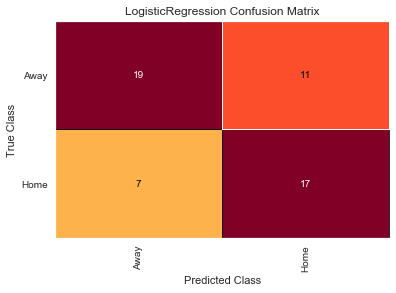

-------------------------- K Nearest Neighbors ----------------------------


The training accuracy is: 0.7605633802816901


The testing accuracy is: 0.6111111111111112


-------Classification Report--------
              precision    recall  f1-score   support

        Home       0.55      0.75      0.63        24
        Away       0.71      0.50      0.59        30

    accuracy                           0.61        54
   macro avg       0.63      0.62      0.61        54
weighted avg       0.64      0.61      0.61        54

-------Confusion Matrix--------


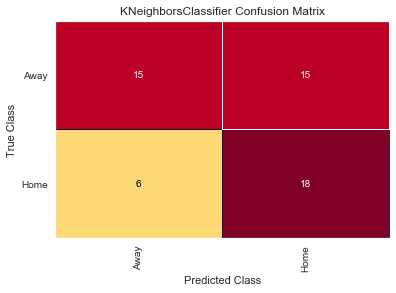

-------------------------- Decision Tree ----------------------------


The training accuracy is: 1.0


The testing accuracy is: 0.7037037037037037


-------Classification Report--------
              precision    recall  f1-score   support

        Home       0.64      0.75      0.69        24
        Away       0.77      0.67      0.71        30

    accuracy                           0.70        54
   macro avg       0.71      0.71      0.70        54
weighted avg       0.71      0.70      0.70        54

-------Confusion Matrix--------


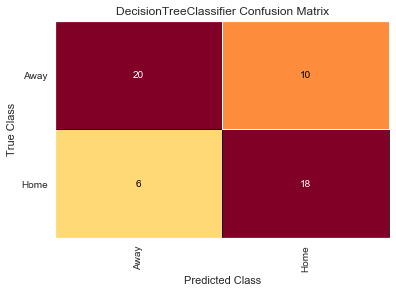

-------------------------- Random Forest ----------------------------


The training accuracy is: 0.9906103286384976


The testing accuracy is: 0.6851851851851852


-------Classification Report--------
              precision    recall  f1-score   support

        Home       0.61      0.79      0.69        24
        Away       0.78      0.60      0.68        30

    accuracy                           0.69        54
   macro avg       0.70      0.70      0.69        54
weighted avg       0.71      0.69      0.68        54

-------Confusion Matrix--------


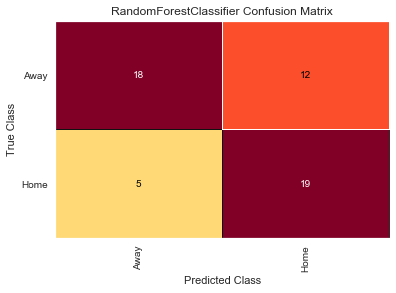

-------------------------- XGBoost ----------------------------


The training accuracy is: 1.0


The testing accuracy is: 0.7037037037037037


-------Classification Report--------
              precision    recall  f1-score   support

        Home       0.64      0.75      0.69        24
        Away       0.77      0.67      0.71        30

    accuracy                           0.70        54
   macro avg       0.71      0.71      0.70        54
weighted avg       0.71      0.70      0.70        54

-------Confusion Matrix--------


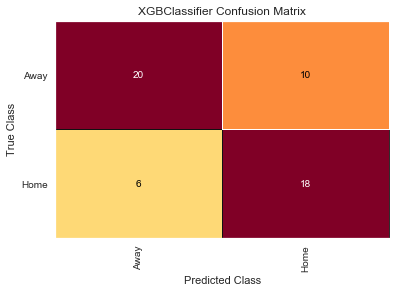

In [32]:
pipelines(X, y, 42, .20)

-------------------------- Logistic Regression ----------------------------


The training accuracy is: 0.755868544600939


The testing accuracy is: 0.7592592592592593


-------Classification Report--------
              precision    recall  f1-score   support

        Home       0.68      0.88      0.76        24
        Away       0.87      0.67      0.75        30

    accuracy                           0.76        54
   macro avg       0.77      0.77      0.76        54
weighted avg       0.78      0.76      0.76        54

-------Confusion Matrix--------


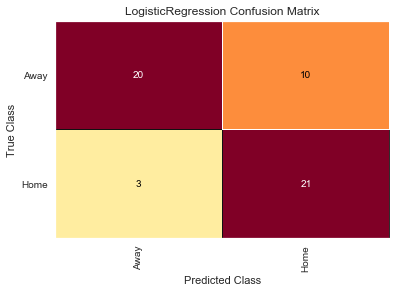

-------------------------- K Nearest Neighbors ----------------------------


The training accuracy is: 0.7605633802816901


The testing accuracy is: 0.5925925925925926


-------Classification Report--------
              precision    recall  f1-score   support

        Home       0.53      0.75      0.62        24
        Away       0.70      0.47      0.56        30

    accuracy                           0.59        54
   macro avg       0.61      0.61      0.59        54
weighted avg       0.62      0.59      0.59        54

-------Confusion Matrix--------


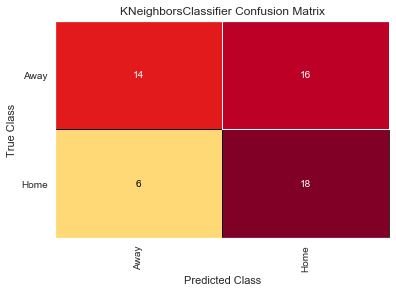

-------------------------- Decision Tree ----------------------------


The training accuracy is: 1.0


The testing accuracy is: 0.7037037037037037


-------Classification Report--------
              precision    recall  f1-score   support

        Home       0.62      0.83      0.71        24
        Away       0.82      0.60      0.69        30

    accuracy                           0.70        54
   macro avg       0.72      0.72      0.70        54
weighted avg       0.73      0.70      0.70        54

-------Confusion Matrix--------


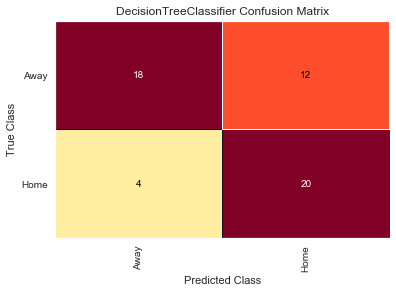

-------------------------- Random Forest ----------------------------


The training accuracy is: 0.9859154929577465


The testing accuracy is: 0.7592592592592593


-------Classification Report--------
              precision    recall  f1-score   support

        Home       0.70      0.79      0.75        24
        Away       0.81      0.73      0.77        30

    accuracy                           0.76        54
   macro avg       0.76      0.76      0.76        54
weighted avg       0.77      0.76      0.76        54

-------Confusion Matrix--------


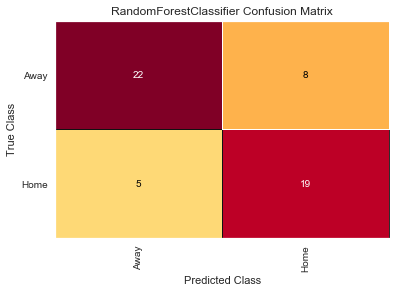

-------------------------- XGBoost ----------------------------


The training accuracy is: 0.9953051643192489


The testing accuracy is: 0.6666666666666666


-------Classification Report--------
              precision    recall  f1-score   support

        Home       0.59      0.79      0.68        24
        Away       0.77      0.57      0.65        30

    accuracy                           0.67        54
   macro avg       0.68      0.68      0.67        54
weighted avg       0.69      0.67      0.66        54

-------Confusion Matrix--------


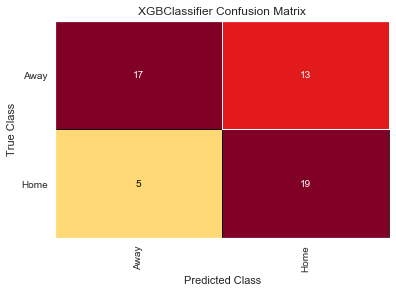

In [33]:
#and let's try with the boruta features 
X = NFL[boruta]
pipelines(X, y, 42, .20)

In [34]:
#grid parameters
grid1 = {
    'dtree__criterion': ['gini', 'entropy'],
    'dtree__max_depth': [None, 2, 3, 4, 5, 6],
    'dtree__min_samples_split': [2, 5, 10],
    'dtree__min_samples_leaf': [1, 2, 3, 4, 5, 6]
}

grid2 = {
    'rf__criterion': ['gini', 'entropy'],
    'rf__max_depth': [None, 2, 3, 4, 5, 6],
    'rf__min_samples_split': [2, 5, 10],
    'rf__min_samples_leaf': [1, 2, 3, 4, 5, 6]
}

grid3 = {
    'xgb__max_depth': [1, 2, 3, 4, 5, 6],
}

#gridsearch functions

gridsearch_DTree = GridSearchCV(estimator=DTree, 
                          param_grid=grid1, 
                          scoring='accuracy', 
                          cv=5)

gridsearch_RF = GridSearchCV(estimator=RF, 
                          param_grid=grid2, 
                          scoring='accuracy', 
                          cv=5)

gridsearch_XGB = GridSearchCV(estimator=XGB, 
                          param_grid=grid3, 
                          scoring='accuracy', 
                          cv=5)

In [35]:
Models = [LR, KNN, gridsearch_DTree, gridsearch_RF, gridsearch_XGB]
Model_Names = ['Logistic Regression','K Nearest Neighbors','Decision Tree','Random Forest','XGB']

def pipelines_compare_grid(X, y, random_state, test_size):
    
    #train/test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=random_state, test_size=test_size)
    
    #Fit/Predict models
    for model, name in zip(Models, Model_Names):
        #fitting
        model.fit(X_train, y_train)
        #predicting
        train_preds = model.predict(X_train)
        test_preds = model.predict(X_test)
        training_accuracy = accuracy_score(y_train, train_preds)
        testing_accuracy = accuracy_score(y_test, test_preds)
        #printing results
        print('--------------------------', name,'----------------------------')
        print('\n')
        print('Training Accuracy:', training_accuracy, 'Testing Accuracy', testing_accuracy)
        print(classification_report(y_test, test_preds, labels=["Home","Away"]))

In [36]:
#trying again with the random forest features
X = NFL[nfl_feats]
pipelines_compare_grid(X, y, 42, .20)

-------------------------- Logistic Regression ----------------------------


Training Accuracy: 0.7746478873239436 Testing Accuracy 0.6666666666666666
              precision    recall  f1-score   support

        Home       0.61      0.71      0.65        24
        Away       0.73      0.63      0.68        30

    accuracy                           0.67        54
   macro avg       0.67      0.67      0.67        54
weighted avg       0.68      0.67      0.67        54

-------------------------- K Nearest Neighbors ----------------------------


Training Accuracy: 0.7605633802816901 Testing Accuracy 0.6111111111111112
              precision    recall  f1-score   support

        Home       0.55      0.75      0.63        24
        Away       0.71      0.50      0.59        30

    accuracy                           0.61        54
   macro avg       0.63      0.62      0.61        54
weighted avg       0.64      0.61      0.61        54

-------------------------- Decision Tree -

In [37]:
#and again with the boruta features 
X = NFL[boruta]
pipelines_compare_grid(X, y, 42, .20)

-------------------------- Logistic Regression ----------------------------


Training Accuracy: 0.755868544600939 Testing Accuracy 0.7592592592592593
              precision    recall  f1-score   support

        Home       0.68      0.88      0.76        24
        Away       0.87      0.67      0.75        30

    accuracy                           0.76        54
   macro avg       0.77      0.77      0.76        54
weighted avg       0.78      0.76      0.76        54

-------------------------- K Nearest Neighbors ----------------------------


Training Accuracy: 0.7605633802816901 Testing Accuracy 0.5925925925925926
              precision    recall  f1-score   support

        Home       0.53      0.75      0.62        24
        Away       0.70      0.47      0.56        30

    accuracy                           0.59        54
   macro avg       0.61      0.61      0.59        54
weighted avg       0.62      0.59      0.59        54

-------------------------- Decision Tree --

#### Let's just make sure that our training set is balanced before moving on to neural networks. 

In [38]:
y_train.value_counts()

1    111
0    102
Name: Winner_Home, dtype: int64

#### These are good but not great results. Let's try a neural network.

In [39]:
X = NFL_Dummies.drop(['Winner_Home','Winner_Away','Home_Team','Away_Team','Home_Win','Away_Win'], axis=1)[boruta]
y = np.array(NFL_Dummies.Winner_Home)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=11, test_size=.2)

In [40]:
from keras import layers 
from keras import models 
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.models import Sequential 
from sklearn.preprocessing import StandardScaler
from keras import optimizers 

np.random.seed(8)

# CNN model 

model_1 = Sequential()

model_1.add(Dropout(.2, input_shape=(9,)))

model_1.add(Dense(64, activation='relu'))

model_1.add(Dense(56, activation='relu'))

model_1.add(Dense(40, activation='relu'))

model_1.add(Dense(32, activation='relu'))

model_1.add(Dropout(.3))

model_1.add(Dense(8, activation='relu'))

model_1.add(Dense(1, activation='sigmoid'))


#standard scaling

scaler = StandardScaler().fit(X_train)

X_train = scaler.transform(X_train)

X_test = scaler.transform(X_test)

#model compilation

model_1.compile(loss='binary_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

#fit
model_1.fit(X_train, y_train,epochs=50, batch_size=16, verbose=1, validation_data=(X_test, y_test))

Using TensorFlow backend.


Train on 213 samples, validate on 54 samples
Epoch 1/50
213/213 [==============================] - 0s 1ms/step - loss: 0.6679 - acc: 0.5399 - val_loss: 0.6587 - val_acc: 0.5370
Epoch 2/50
213/213 [==============================] - 0s 154us/step - loss: 0.6680 - acc: 0.5258 - val_loss: 0.6534 - val_acc: 0.6296
Epoch 3/50
213/213 [==============================] - 0s 129us/step - loss: 0.6654 - acc: 0.5493 - val_loss: 0.6471 - val_acc: 0.6296
Epoch 4/50
213/213 [==============================] - 0s 134us/step - loss: 0.6495 - acc: 0.5540 - val_loss: 0.6419 - val_acc: 0.6481
Epoch 5/50
213/213 [==============================] - 0s 158us/step - loss: 0.6540 - acc: 0.5869 - val_loss: 0.6359 - val_acc: 0.6852
Epoch 6/50
213/213 [==============================] - 0s 140us/step - loss: 0.6526 - acc: 0.5822 - val_loss: 0.6317 - val_acc: 0.7037
Epoch 7/50
213/213 [==============================] - 0s 154us/step - loss: 0.6444 - acc: 0.6009 - val_loss: 0.6273 - val_acc: 0.6852
Epoch 8/50
213/213 

In [41]:
y_pred = model_1.predict(X_test)

score = model_1.evaluate(X_test, y_test,verbose=1)

print(score)

54/54 [==============================] - 0s 59us/step
[0.5508756240208944, 0.7407407363255819]


In [42]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes=(10, 30, 90), max_iter=150)
mlp.fit(X_train, y_train)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(10, 30, 90), learning_rate='constant',
              learning_rate_init=0.001, max_iter=150, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=None, shuffle=True, solver='adam', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

In [43]:
predictions = mlp.predict(X_test)

In [44]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))

[[19  7]
 [ 7 21]]
              precision    recall  f1-score   support

           0       0.73      0.73      0.73        26
           1       0.75      0.75      0.75        28

    accuracy                           0.74        54
   macro avg       0.74      0.74      0.74        54
weighted avg       0.74      0.74      0.74        54



#### Well, 74% isn't too bad at all! Let's save the model and finish up some other odds and ends. 

In [45]:
## Saving the model 
##final_model = model_1.to_json()
##with open("/Users/carlyfaye/Documents/Flatiron/Pickem_Predictions/Model_Files/final_model.json",'w') as json_file:
    ##json_file.write(final_model)

In [46]:
##model_1.save_weights("'/Users/carlyfaye/Documents/Flatiron/Pickem_Predictions/Model_Files/final_model.h5")

Quick check of the super bowl prediction!

In [47]:
X = NFL_Dummies.drop(['Winner_Home','Winner_Away','Home_Team','Away_Team','Home_Win','Away_Win'], axis=1)[boruta].tail(1)

In [48]:
model_1.predict_proba(X)

array([[0.99999225]], dtype=float32)

Our model predicted a 99% chance the chiefs win the superbowl. While this is only one example it's nice to see it get it right!